In [2]:
# https://www.cs.toronto.edu/~kriz/cifar.html
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2022-12-30 12:19:59--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  12.9MB/s    in 13s     

2022-12-30 12:20:15 (12.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [3]:
!tar -xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
temp = unpickle('cifar-10-batches-py/data_batch_1')
temp.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [7]:
temp[b'batch_label']

b'training batch 1 of 5'

In [8]:
print(len(temp[b'labels']))
temp[b'labels'][:3]

10000


[6, 9, 9]

In [9]:
print(len(temp[b'data'][:3][0]))
print(32*32*3)
temp[b'data'][:3]

3072
3072


array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84]], dtype=uint8)

In [10]:
temp[b'filenames'][:3]

[b'leptodactylus_pentadactylus_s_000004.png',
 b'camion_s_000148.png',
 b'tipper_truck_s_001250.png']

In [11]:
X = np.array(temp[b'data'])
y = np.array(temp[b'labels'])

In [12]:
X.shape, y.shape

((10000, 3072), (10000,))

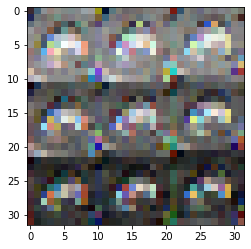

In [13]:
# for printing the image > plt.imshow
# it is linear > reshape
plt.imshow(X[0].reshape(32,32,3))

In [14]:
'''
data -- a 10000x3072 numpy array of uint8s. 
Each row of the array stores a 32x32 colour image. 
The first 1024 entries contain the red channel values, 
the next 1024 the green, and the final 1024 the blue. 
The image is stored in row-major order, 
so that the first 32 entries of the array are the red channel values of the first row of the image.


when we reshape the 32*32*3 it picks each 32 and assings RGB in a row
first 32*32 is R, ...
the currect way for this is to pick each 3 and assings RGB in a row
each 3 creates one block in RGB
'''

'\ndata -- a 10000x3072 numpy array of uint8s. \nEach row of the array stores a 32x32 colour image. \nThe first 1024 entries contain the red channel values, \nthe next 1024 the green, and the final 1024 the blue. \nThe image is stored in row-major order, \nso that the first 32 entries of the array are the red channel values of the first row of the image.\n\n\nwhen we reshape the 32*32*3 it picks each 32 and assings RGB in a row\nfirst 32*32 is R, ...\nthe currect way for this is to pick each 3 and assings RGB in a row\neach 3 creates one block in RGB\n'

In [15]:
test = X[0].reshape(3,32,32)
test.shape, test.transpose([1,2,0]).shape

((3, 32, 32), (32, 32, 3))

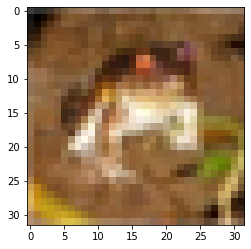

In [16]:
# the plot needs to have the channel number at last
# by transposing we define where each shape size is by the index in a list

plt.imshow(test.transpose([1,2,0]))

In [17]:
# normalizing in the pictures > unlike the previous to find the meand and std
# just /255
X = X/255

In [18]:
X.shape

(10000, 3072)

In [19]:
r = np.random.permutation(X.shape[0])

# we have to shuffle them based on each other not separately
X = X[r]
y = y[r]

In [27]:
X_train = X[:1000]
X_test = X[1000:2000]

y_train = y[:1000]
y_test = y[1000:2000]

In [28]:
clf = MLPClassifier(hidden_layer_sizes=[600,], batch_size=4, max_iter=2)

In [29]:
# sklearn doesn't use gpu
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=4, hidden_layer_sizes=[600], max_iter=2)

In [30]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.264, 0.226)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


0.188 0.176
0.246 0.214
0.269 0.244
0.288 0.273
0.242 0.225
0.271 0.219
0.337 0.27
0.343 0.269
0.295 0.234
0.343 0.28


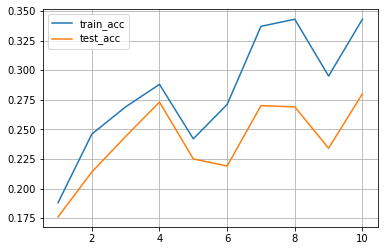

In [34]:
# sklearn has the funstion to draw the old learning curve (???) but to draw the new LC > do this
# warm start not initails the Wi at each train > continue from the last Wi

clf = MLPClassifier(hidden_layer_sizes=[100,], batch_size=4, 
              max_iter=1, warm_start=True)


train_acc = []
test_acc = []

for i in range(10):
  clf.fit(X_train, y_train)
  print(clf.score(X_train, y_train), clf.score(X_test, y_test))
  train_acc.append(clf.score(X_train, y_train))
  test_acc.append(clf.score(X_test, y_test))

plt.plot(range(1,11), train_acc, label="train_acc")
plt.plot(range(1,11), test_acc, label="test_acc")

plt.grid()
plt.legend()

#it is an acc plot

In [36]:
pred = clf.predict(X_test)
print(pred[:10])

[8 1 8 7 8 0 4 3 1 1]


In [37]:
cm = confusion_matrix(y_test, pred)
cm

array([[34,  7,  0,  1,  1,  0,  2,  8, 30, 11],
       [ 6, 39,  0,  4,  3,  0,  0,  6,  6, 33],
       [19,  8,  0,  7, 18,  1,  6, 35, 11,  1],
       [ 2, 11,  0, 18, 11,  6,  6, 15, 10, 19],
       [10, 10,  1,  9, 20,  0,  6, 23,  5,  7],
       [ 4, 10,  1, 18,  8,  3,  4, 16,  8, 10],
       [ 0, 10,  1, 19, 13,  3, 12, 34,  2,  4],
       [ 5,  5,  0,  9, 16,  0,  4, 36,  6, 27],
       [12, 14,  0,  4,  0,  0,  0,  4, 51, 32],
       [ 1, 13,  0,  4,  0,  0,  0,  5, 19, 67]])

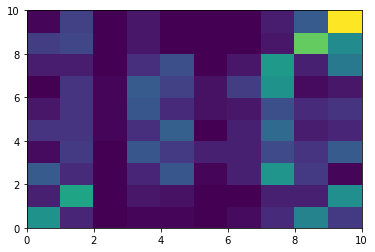

In [38]:
plt.pcolormesh(cm)

([<matplotlib.axis.YTick at 0x7f84a604d5e0>,
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'ship')])

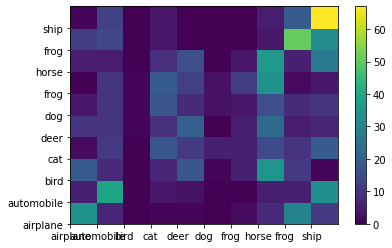

In [41]:
plt.pcolormesh(cm)

plt.colorbar()

plt.xticks(range(10), ["airplane","automobile","bird","cat","deer","dog","frog","horse","frog","ship","truck"])
plt.yticks(range(10), ["airplane","automobile","bird","cat","deer","dog","frog","horse","frog","ship","truck"])

In [42]:
'''
if you have two amny problems with one class in multiclass
you can fit one extra binary class to clarify the answer 
when the main models tells this is the class
'''

'\nif you have two amny problems with one class in multiclass\nyou can fit one extra binary class to clarify the answer \nwhen the main models tells this is the class\n'

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 3600x3600 with 0 Axes>

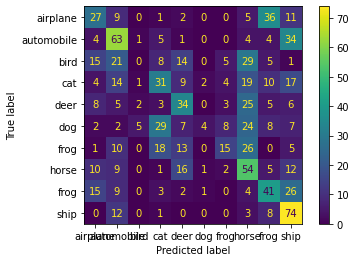

In [47]:
from sklearn.metrics import plot_confusion_matrix

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","frog","ship","truck"]
disp = plot_confusion_matrix(clf,
                             X_train,
                             y_train,
                             display_labels=class_names)